## Customer Segmentation Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/Users/TECH/Desktop/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

C:\Users\TECH\AppData\Local\Temp\ipykernel_7672\2680363870.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\TECH\AppData\Local\Temp\ipykernel_7672\2680363870.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\TECH\AppData\Local\Temp\ipykernel_7672\26803638

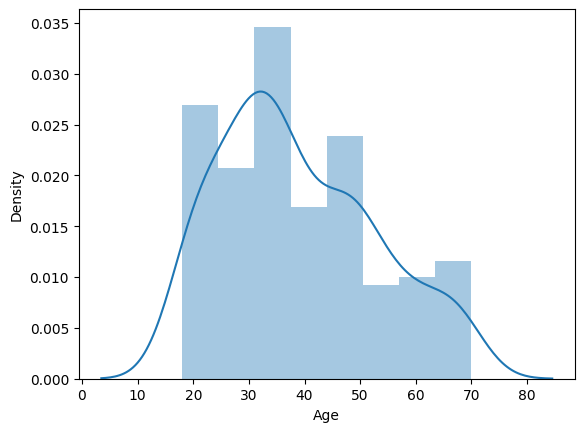

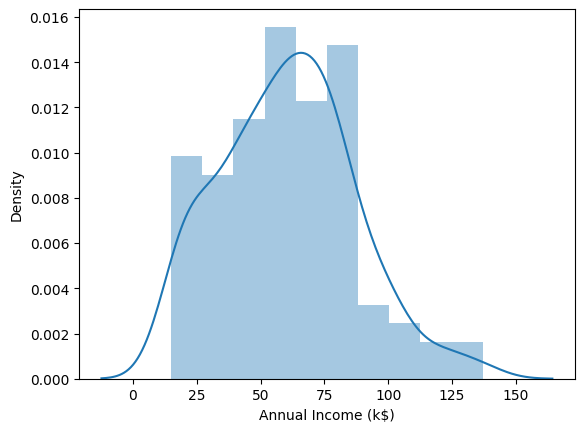

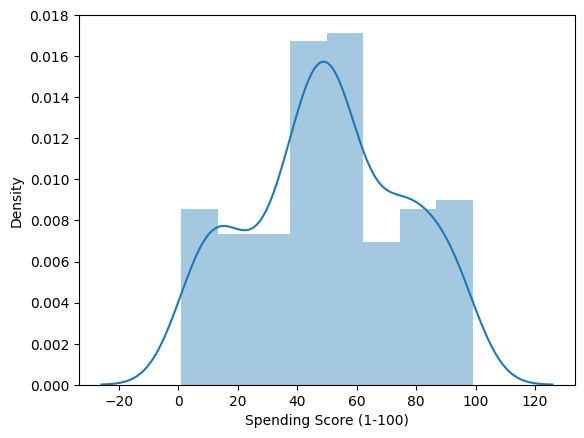

In [8]:
columns = ['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(data[i])

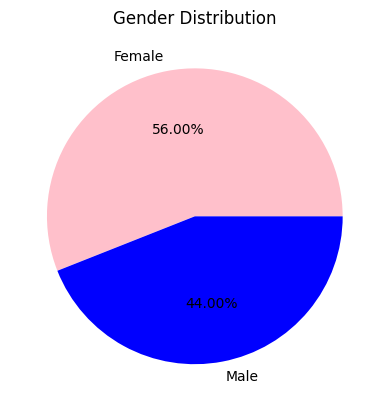

In [9]:
df = data.groupby('Genre').size()
df.plot(kind = 'pie', subplots = True, colors = ['pink', 'blue'], explode = [0,0.001], labels = ['Female', 'Male'], autopct = '%.2f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

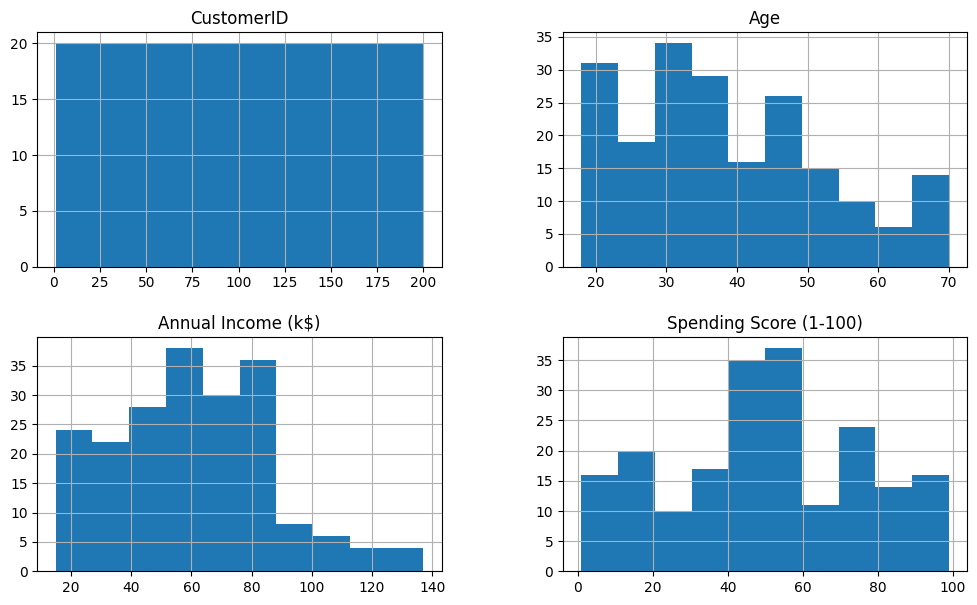

In [10]:
data.hist(figsize=(12,7))
plt.show()

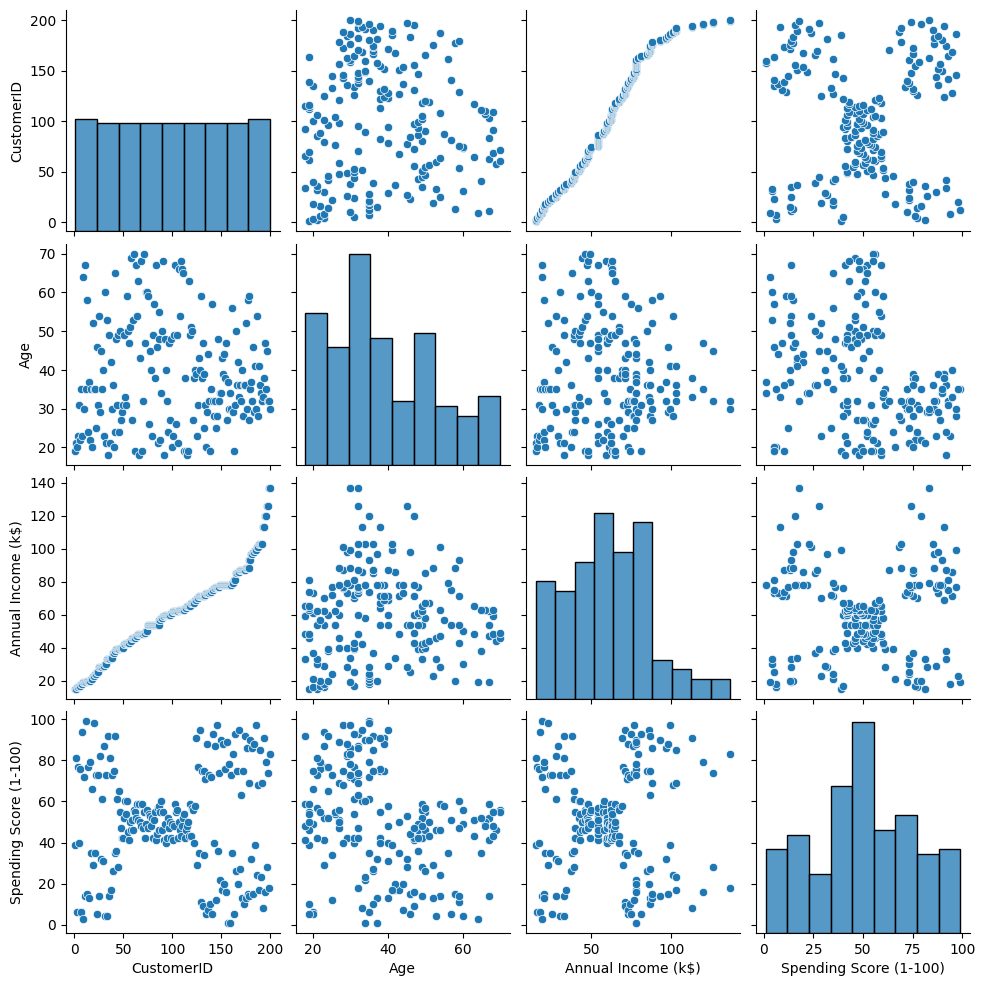

In [11]:
sns.pairplot(data)
plt.show()

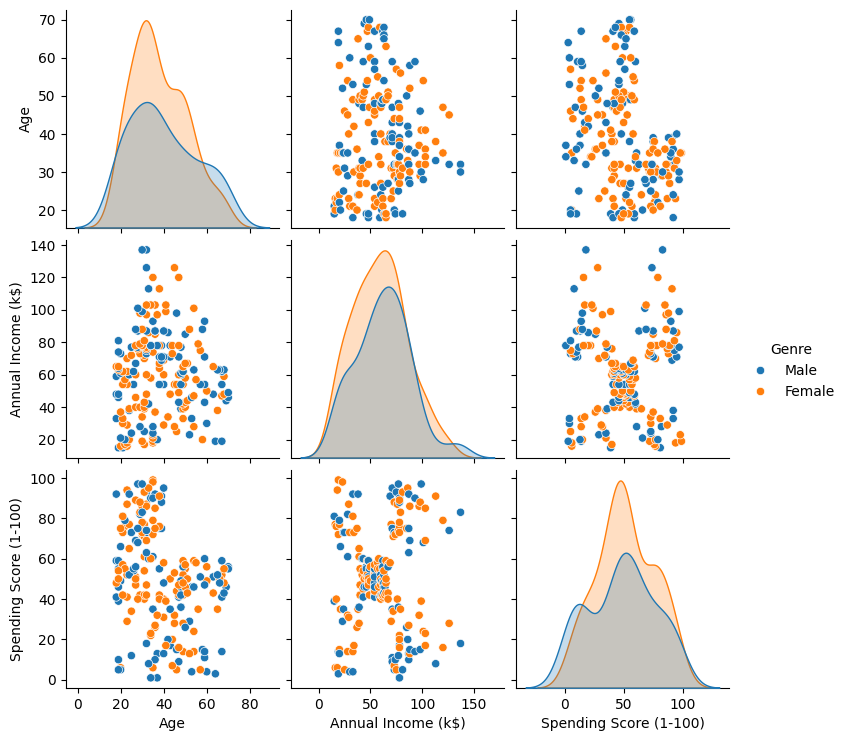

In [12]:
sns.pairplot(data , vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = 'Genre' )

In [13]:
%pip install dabl

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dabl (from versions: none)
ERROR: No matching distribution found for dabl


In [15]:
import dabl

Target looks like regression


c:\Users\TECH\AppData\Local\Programs\Python\Python312\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.33E-02'}, xlabel='Spending Score (1-100)', ylabel='Genre'>]],
       dtype=object)]

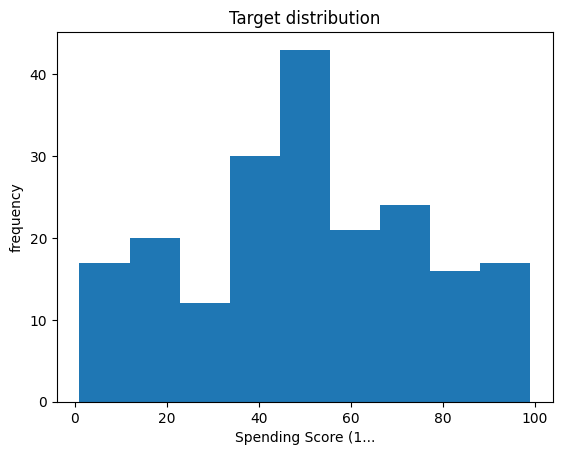

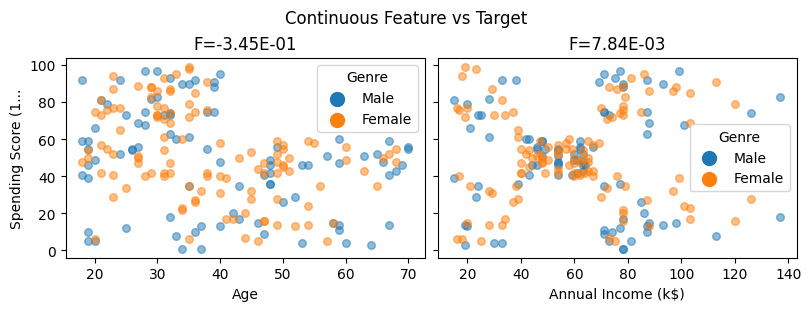

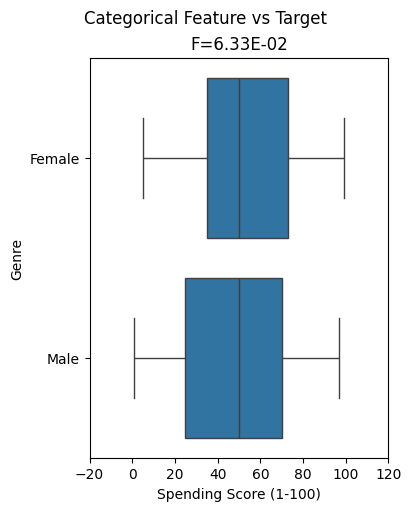

In [16]:
dabl.plot(data, target_col = 'Spending Score (1-100)')

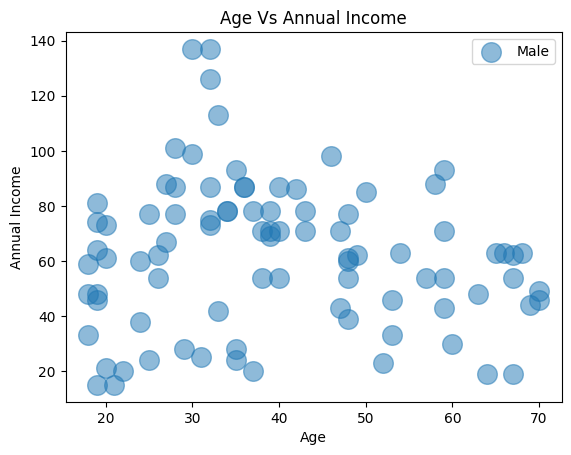

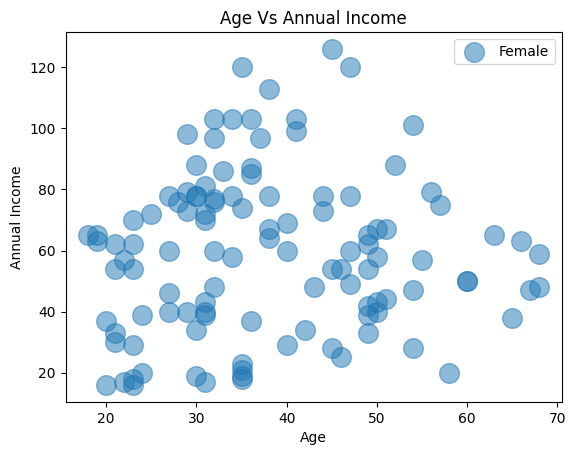

In [26]:

for gender in ['Male','Female']:
    plt.scatter(x='Age', y = 'Annual Income (k$)', data = data[data['Genre']==gender], s = 200, alpha = 0.5, label = gender )
    plt.xlabel("Age")
    plt.ylabel("Annual Income")
    plt.title("Age Vs Annual Income")
    plt.legend()
    plt.show()

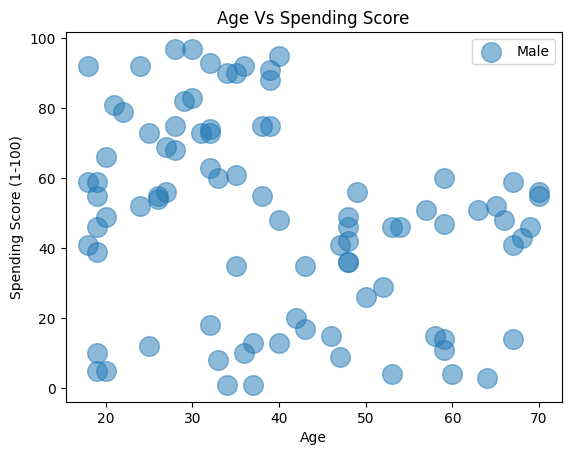

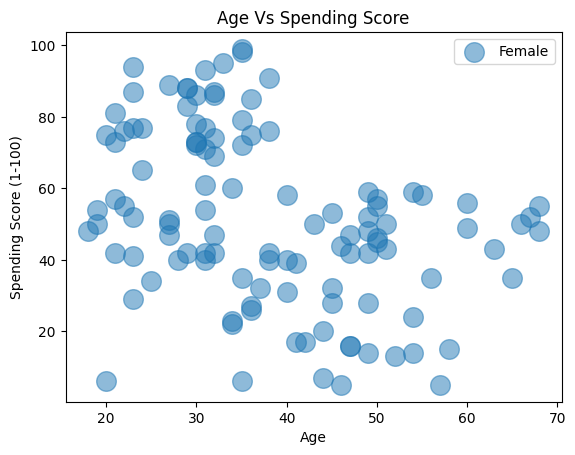

In [27]:
for gender in ['Male','Female']:
    plt.scatter(x='Age', y = 'Spending Score (1-100)', data = data[data['Genre']==gender], s = 200, alpha = 0.5, label = gender )
    plt.xlabel("Age")
    plt.ylabel("Spending Score (1-100)")
    plt.title("Age Vs Spending Score")
    plt.legend()
    plt.show()

In [28]:
x = data.iloc[:, [3,4]].values

In [29]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [40]:
clustering1 = KMeans(n_clusters=6)

In [41]:
clustering1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [42]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [43]:
data['Income Cluster'] = clustering1.labels_
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [44]:
data['Income Cluster'].value_counts()

Income Cluster
0    56
2    50
1    28
5    24
4    22
3    20
Name: count, dtype: int64

In [45]:
clustering1.inertia_

7544.1585281385305

In [55]:
intertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [56]:
intertia_scores

[137277.28000000006,
 49761.73701298703,
 23528.15217391306,
 13757.071717171719,
 8667.679614837507,
 7097.3121516165,
 4144.146997929607,
 2836.104761904765,
 2450.5339660339673,
 1736.5656510156518]

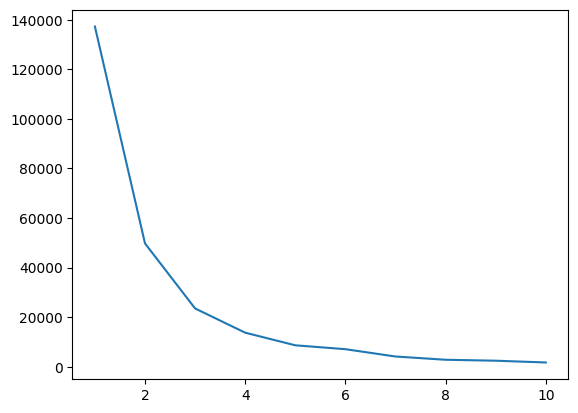

In [57]:
plt.plot(range(1,11), intertia_scores)

In [50]:
data.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.410714,78.892857,49.642857
1,34.750000,20.928571,49.785714
2,41.520000,60.440000,50.060000
3,36.600000,109.700000,52.000000
4,35.954545,35.636364,49.090909
5,48.291667,46.166667,51.791667


## ivariate clustering

In [51]:
clustering2 = KMeans()
clustering2.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
data['Spending and Income Clusters'] = clustering2.labels_
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Clusters
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,6
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,6
4,5,Female,31,17,40,1,0


In [58]:
intertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)

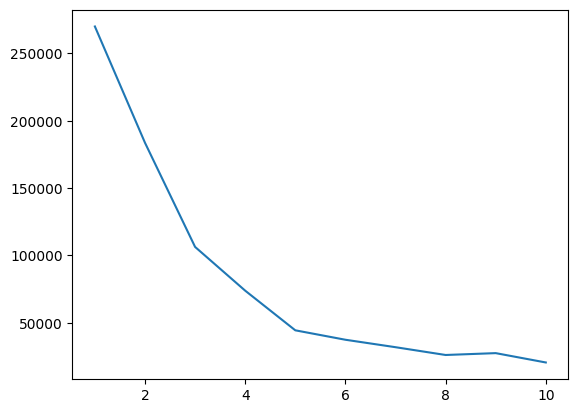

In [59]:
plt.plot(range(1,11),intertia_scores2)

In [60]:
df = data

In [69]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

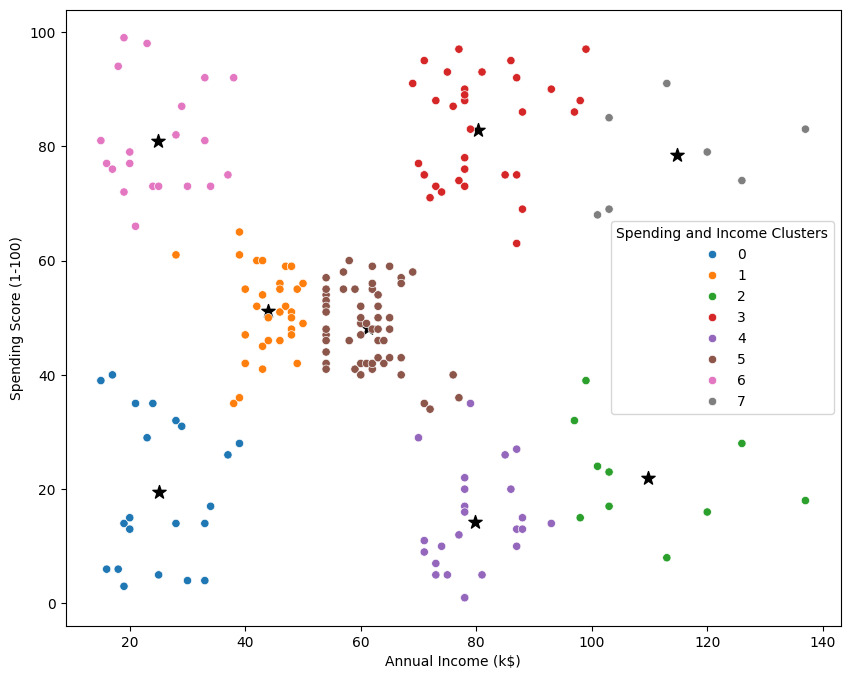

In [70]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'],s=100,c='black', marker='*')
sns.scatterplot(data = df , x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' ,
                hue = 'Spending and Income Clusters' ,
                palette = 'tab10')

In [71]:
pd.crosstab(df['Spending and Income Clusters'],df['Genre'])

Genre,Female,Male
Spending and Income Clusters,,
0,13,8
1,20,13
2,7,3
3,17,15
4,9,15
5,30,23
6,12,8
7,4,3


## Multivariate Clustering

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scale = StandardScaler()

In [74]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Clusters
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,6
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,6
4,5,Female,31,17,40,1,0


In [76]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Clusters,Genre_Male
0,1,19,15,39,1,0,True
1,2,21,15,81,1,6,True
2,3,20,16,6,1,0,False
3,4,23,16,77,1,6,False
4,5,31,17,40,1,0,False


In [77]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Clusters', 'Genre_Male'],
      dtype='object')

In [78]:
dff = dff[['Age','Annual Income (k$)', 'Spending Score (1-100)','Genre_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [81]:
dff = scale.fit_transform(dff)

In [82]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [83]:
intertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    intertia_scores3.append(kmeans3.inertia_)

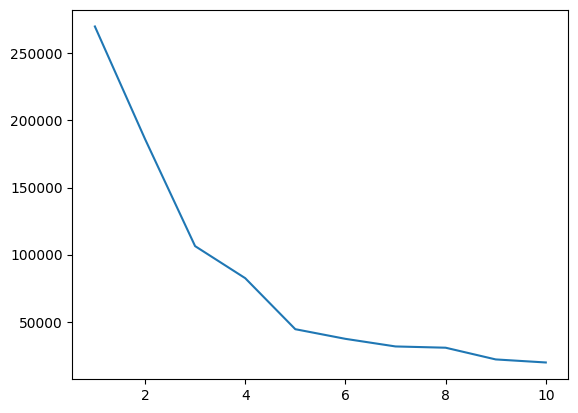

In [84]:
plt.plot(range(1,11), intertia_scores3)

In [85]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Clusters
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,6
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,6
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,7
196,197,Female,45,126,28,3,2
197,198,Male,32,126,74,3,7
198,199,Male,32,137,18,3,2


In [86]:
df.to_csv("Customer_Segmentation_Analysis")